<a href="https://colab.research.google.com/github/fateme-alk/learning/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from statsmodels.stats.stattools import durbin_watson

In [ ]:
data = {
    'house_size': [
        600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050,
        1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550,
        1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2100
    ],
    'price': [
        68, 72, 75, 78, 85, 87, 93, 97, 102, 106,
        110, 113, 118, 122, 125, 127, 130, 133, 138, 140,
        144, 147, 149, 152, 155, 158, 162, 165, 170, 175
    ]
}
df = pd.DataFrame(data)


In [ ]:
df

,house_size,price
0,600,68
1,650,72
2,700,75
3,750,78
4,800,85
5,850,87
6,900,93
7,950,97
8,1000,102
9,1050,106


# Simple Linear Regression

<Axes: xlabel='house_size', ylabel='price'>

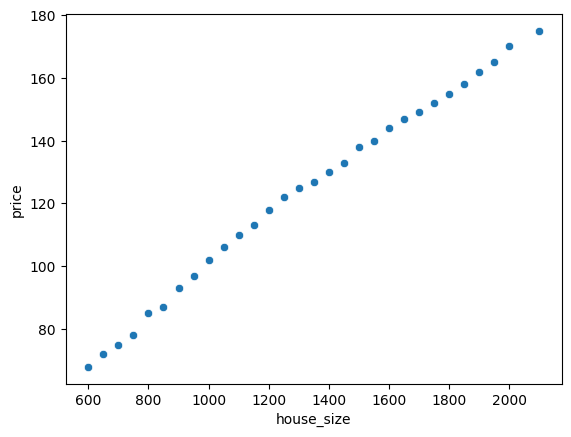

In [ ]:
sns.scatterplot(df, x='house_size', y='price')

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor

LinearRegression()

In [ ]:
df.columns

Index(['house_size', 'price'], dtype='object')

In [ ]:
x = df[['house_size']]
y_observed = df['price']

In [ ]:
regressor.fit(x, y_observed)

LinearRegression()

In [ ]:
regressor.intercept_

np.float64(28.880920320824316)

In [ ]:
regressor.coef_

array([0.07109478])

In [ ]:
regressor.n_features_in_

1

In [ ]:
regressor.n_jobs

In [ ]:
y_predict = regressor.predict(x)

In [ ]:
y_predict

array([ 71.53779053,  75.09252971,  78.6472689 ,  82.20200808,
        85.75674726,  89.31148645,  92.86622563,  96.42096481,
        99.975704  , 103.53044318, 107.08518237, 110.63992155,
       114.19466073, 117.74939992, 121.3041391 , 124.85887829,
       128.41361747, 131.96835665, 135.52309584, 139.07783502,
       142.63257421, 146.18731339, 149.74205257, 153.29679176,
       156.85153094, 160.40627012, 163.96100931, 167.51574849,
       171.07048768, 178.17996604])

In [ ]:
type(y_predict)

numpy.ndarray

In [ ]:
df['predicted_price'] = y_predict

In [ ]:
residual = y_observed - y_predict

In [ ]:
type(residual)

pandas.core.series.Series

In [ ]:
df['price_residual'] = residual

In [ ]:
df

,house_size,price,predicted_price,price_residual
0,600,68,71.537791,-3.537791
1,650,72,75.092530,-3.092530
2,700,75,78.647269,-3.647269
3,750,78,82.202008,-4.202008
4,800,85,85.756747,-0.756747
5,850,87,89.311486,-2.311486
6,900,93,92.866226,0.133774
7,950,97,96.420965,0.579035
8,1000,102,99.975704,2.024296
9,1050,106,103.530443,2.469557


### Residula Mean

In [ ]:
df['price_residual'].mean()

np.float64(5.684341886080802e-15)

### Residula Homoscedasticity

<Axes: xlabel='house_size', ylabel='price_residual'>

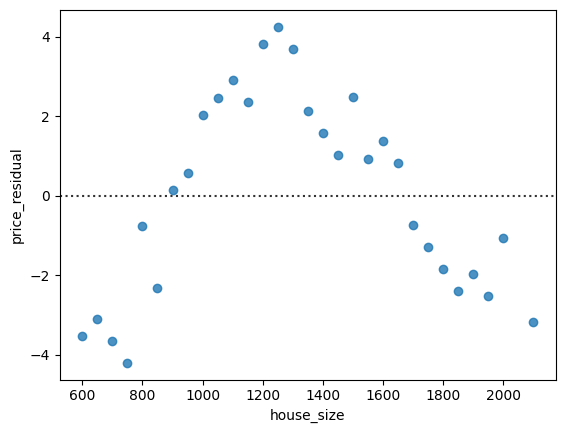

In [ ]:
sns.residplot(data=df, x='house_size', y='price_residual')

### Residula Distribution

<Axes: xlabel='price_residual', ylabel='Density'>

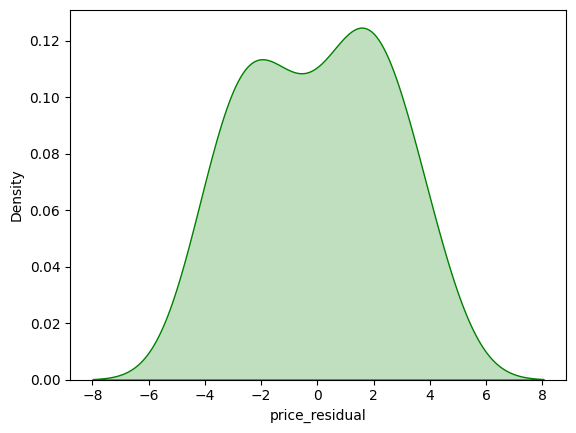

In [ ]:
sns.kdeplot(df['price_residual'], fill=True, color='green')

/tmp/ipython-input-4080107980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_residual'], hist=False, color='r')


<Axes: xlabel='price_residual', ylabel='Density'>

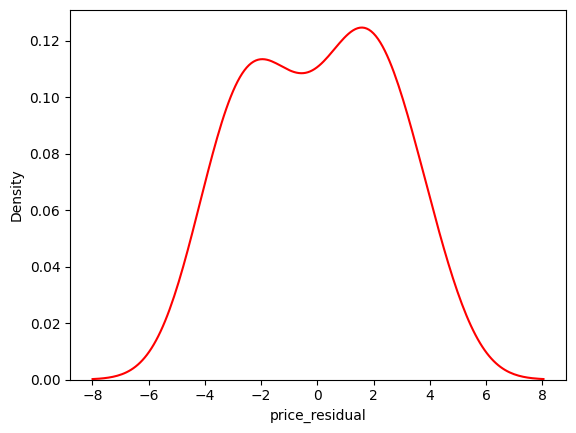

In [ ]:
sns.distplot(df['price_residual'], hist=False, color='r')

/tmp/ipython-input-4184586795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_residual'], hist=True, color='r')


<Axes: xlabel='price_residual', ylabel='Density'>

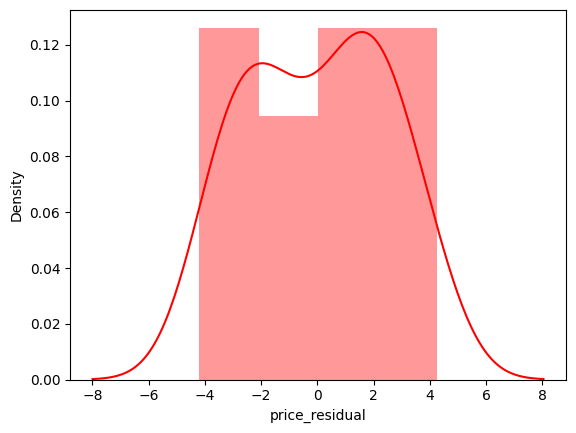

In [ ]:
sns.distplot(df['price_residual'], hist=True, color='r')

### Residuals Dependency

In [ ]:
durbin_watson(df['price_residual'])

np.float64(0.2500568658770075)

### Others

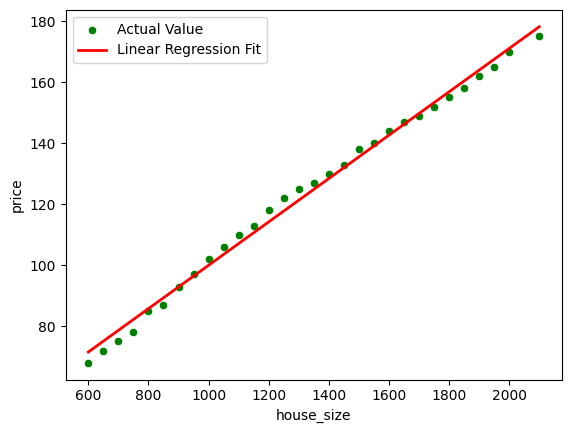

In [ ]:
sns.scatterplot(df, x='house_size', y='price', color="green", label='Actual Value')
plt.plot(df['house_size'], df['predicted_price'], color="red", linewidth=2, label="Linear Regression Fit")
plt.legend()

<Axes: xlabel='predicted_price', ylabel='Density'>

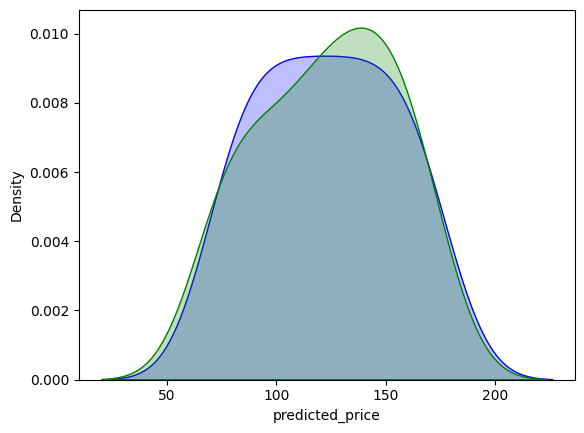

In [ ]:
# compare distribution of actual value and predicted value
sns.kdeplot(df['predicted_price'], fill=True, color='blue')
sns.kdeplot(df['price'], fill=True, color='green')

# Polynomial Regression

## Polynomial Regression - 1 order
  same as simple linear regression which implement above

In [ ]:
coefficients = np.polyfit(df['house_size'], df['price'], 1)

In [ ]:
coefficients

array([ 0.07109478, 28.88092032])

In [ ]:
equation = np.poly1d(coefficients)

In [ ]:
print(equation)

 
0.07109 x + 28.88


## Polynomial Regression - 2 order

In [ ]:
coefficients = np.polyfit(df['house_size'], df['price'], 2)

In [ ]:
coefficients

array([-1.24248871e-05,  1.04184220e-01,  9.20872729e+00])

In [ ]:
equation = np.poly1d(coefficients)

In [ ]:
print(equation)

            2
-1.242e-05 x + 0.1042 x + 9.209


In [ ]:
df['price_predicted_PL2'] = equation(df['house_size'])

In [ ]:
df

,house_size,price,predicted_price,price_residual,price_predicted_PL2
0,600,68,71.537791,-3.537791,67.246300
1,650,72,75.092530,-3.092530,71.678955
2,700,75,78.647269,-3.647269,76.049487
3,750,78,82.202008,-4.202008,80.357893
4,800,85,85.756747,-0.756747,84.604175
5,850,87,89.311486,-2.311486,88.788333
6,900,93,92.866226,0.133774,92.910367
7,950,97,96.420965,0.579035,96.970276
8,1000,102,99.975704,2.024296,100.968060
9,1050,106,103.530443,2.469557,104.903720


In [ ]:
durbin_watson(df['price'] - df['price_predicted_PL2'])

np.float64(0.9211837416914695)

<Axes: xlabel='house_size'>

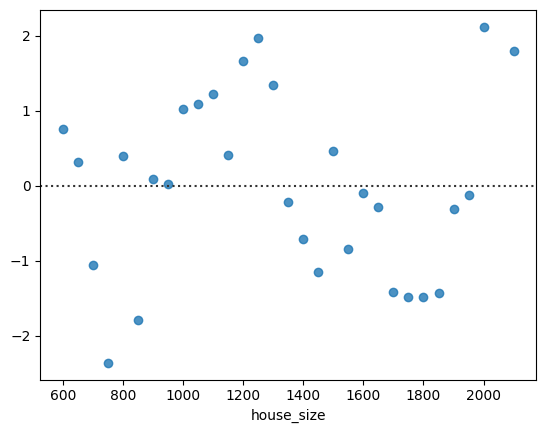

In [ ]:
sns.residplot(data=df, x='house_size', y=df['price']-df['price_predicted_PL2'])

In [ ]:
res_price_predicted_PL2 = df['price'] - df['price_predicted_PL2']
res_price_predicted_PL2.mean()

np.float64(-7.673861546209083e-14)

<Axes: ylabel='Density'>

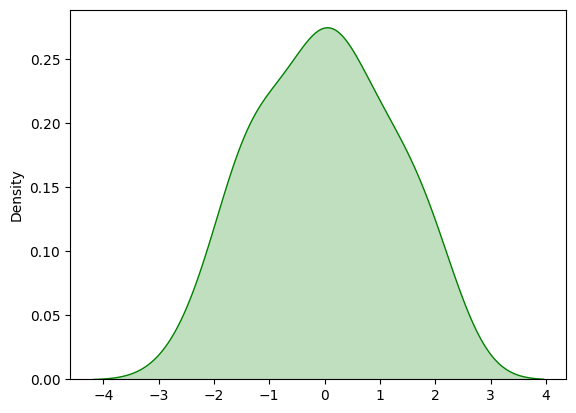

In [ ]:
sns.kdeplot(df['price']-df['price_predicted_PL2'] , fill=True, color='green')

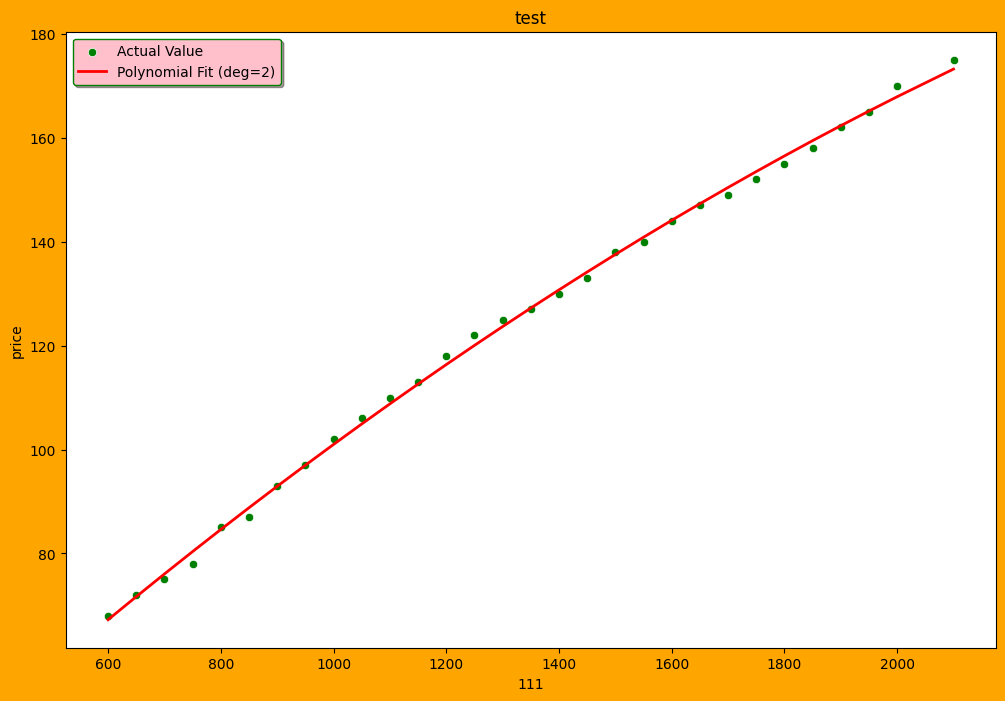

In [ ]:
plt.figure(figsize=(12, 8), facecolor='orange')
sns.scatterplot(df, x='house_size', y='price', color="green", label='Actual Value')
plt.plot(df['house_size'], df['price_predicted_PL2'], color="red", linewidth=2, label="Polynomial Fit (deg=2)")
plt.title('test')
plt.xlabel('111')
plt.legend(shadow=True, edgecolor='green', facecolor='pink')
plt.show()

## Polynomial Regression - 3 order




In [ ]:
coefficients = np.polyfit(df['house_size'], df['price'], 3)

In [ ]:
coefficients

array([ 8.46619701e-09, -4.64307785e-05,  1.46776246e-01, -7.17018910e+00])

In [ ]:
equation = np.poly1d(coefficients)

In [ ]:
print(equation)

           3             2
8.466e-09 x - 4.643e-05 x + 0.1468 x - 7.17


In [ ]:
df['price_predicted_PL3'] = equation(df['house_size'])

In [ ]:
df

,house_size,price,predicted_price,price_residual,price_predicted_PL2,price_predicted_PL3
0,600,68,71.537791,-3.537791,67.246300,66.009177
1,650,72,75.092530,-3.092530,71.678955,70.942396
2,700,75,78.647269,-3.647269,76.049487,75.726007
3,750,78,82.202008,-4.202008,80.357893,80.366359
4,800,85,85.756747,-0.756747,84.604175,84.869802
5,850,87,89.311486,-2.311486,88.788333,89.242686
6,900,93,92.866226,0.133774,92.910367,93.491359
7,950,97,96.420965,0.579035,96.970276,97.622173
8,1000,102,99.975704,2.024296,100.968060,101.641476
9,1050,106,103.530443,2.469557,104.903720,105.555617


In [ ]:
durbin_watson(df['price'] - df['price_predicted_PL3'])

np.float64(1.2529365618366821)

<Axes: xlabel='house_size'>

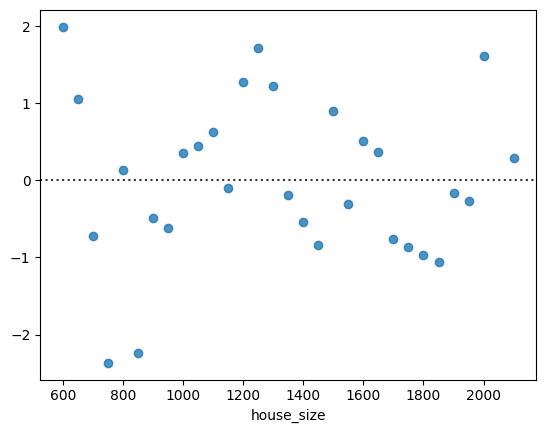

In [ ]:
sns.residplot(data=df, x='house_size', y=df['price']-df['price_predicted_PL3'])

In [ ]:
res_price_predicted_PL2 = df['price'] - df['price_predicted_PL3']
res_price_predicted_PL2.mean()

np.float64(-3.789561257387201e-14)

<Axes: ylabel='Density'>

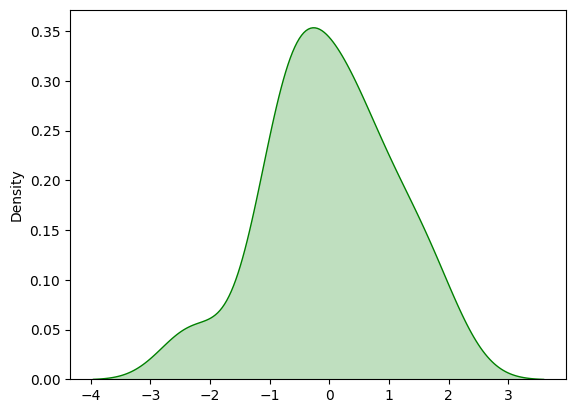

In [ ]:
sns.kdeplot(df['price']-df['price_predicted_PL3'] , fill=True, color='green')

#Others

In [ ]:
p1 = np.poly1d([1, 2])
p2 = np.poly1d([4, 9, 5, 4])

In [ ]:
type(p1)

numpy.poly1d

In [ ]:
p1

poly1d([1, 2])

In [ ]:
print(p1)

 
1 x + 2


In [ ]:
p2

poly1d([4, 9, 5, 4])

In [ ]:
print(p2)

   3     2
4 x + 9 x + 5 x + 4


In [ ]:
p1(0)

np.int64(2)

In [ ]:
print(p1(0))

2


In [ ]:
# Find the roots:
p1.r

array([-2.])

In [ ]:
# Show the coefficients:
p1.c

array([1, 2])

In [ ]:
# Display the order (the leading zero-coefficients are removed):
p1.o

1

In [ ]:
# The name of the polynomial variable
p1.variable

'x'

In [ ]:
p2.variable

'x'

In [ ]:
df

,house_size,price,predicted_price,price_residual
0,600,68,71.537791,-3.537791
1,650,72,75.092530,-3.092530
2,700,75,78.647269,-3.647269
3,750,78,82.202008,-4.202008
4,800,85,85.756747,-0.756747
5,850,87,89.311486,-2.311486
6,900,93,92.866226,0.133774
7,950,97,96.420965,0.579035
8,1000,102,99.975704,2.024296
9,1050,106,103.530443,2.469557


<Axes: xlabel='house_size', ylabel='price'>

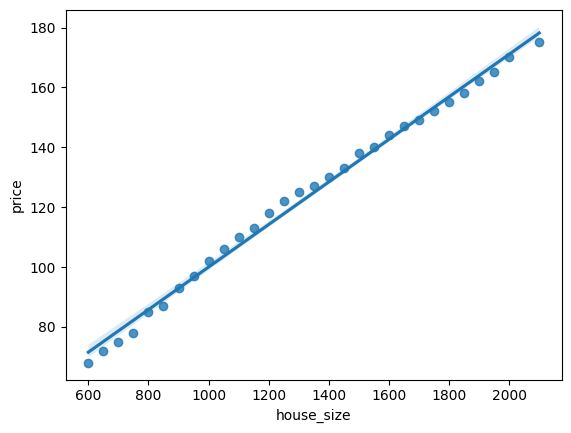

In [ ]:
sns.regplot(x='house_size', y='price', data=df)